## MODELO PROYECTO IGAC

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

In [2]:
#df= pd.read_("Proyecto_IGAC/data/DataFrame.pkl")

In [3]:
with open('../Datos_Limpios_modelo_2.csv') as f:
    df = pd.read_csv(f, delimiter=',')

In [4]:
df.head(30)

,TIPO_OBSERVACION,CLIMA_AMBIENTAL,CLASE_PENDIENTE,REGIMEN_TEMPERATURA,REGIMEN_HUMEDAD,DRENAJE_NATURAL,H1_NOMENCLATURA,H1_ESPESOR,H1_COLOR_MATRIZ_HUMEDO1,H1_RESULTADO_ph,...,H2_ESPESOR,EPIPEDON,FAMILIA_TEXTURAL,ORDEN,LATITUD,LONGITUD,ALTITUD,PROFUNDIDAD MAXIMA,IGUALDAD,CONTENIDO_CENIZA_VOLCANICA
0,Perfil,Extremadamente_frio_humedo,Ligeramente_inclinada,Isofrigido,Acuico,Muy_pobre,A1,53.0,Negro,4.2,...,33.0,Melanico,Hidrosa,Andisol,5.100444,-74.023056,3583.0,105.0,True,True
1,Cajuela,Extremadamente_frio_humedo,Moderadamente_inclinada,Isofrigido,Acuico,Pobre,Oi,26.0,Gris,4.0,...,34.0,Histico,Medial,Andisol,5.259944,-73.991806,3754.0,80.0,True,True
2,Cajuela,Extremadamente_frio_humedo,Ligeramente_plana,Isofrigido,Acuico,Muy_pobre,Oi,12.0,Pardo,4.5,...,14.0,Histico,Medial,Andisol,5.255167,-73.976417,3619.0,120.0,True,False
3,Cajuela,Extremadamente_frio_humedo,Ligeramente_plana,Isofrigido,Acuico,Muy_pobre,Oi,37.0,Rojo,4.5,...,27.0,Histico,Medial,Andisol,5.256639,-73.983722,3600.0,64.0,True,False
4,Cajuela,Extremadamente_frio_humedo,Ligeramente_plana,Isofrigido,Acuico,Muy_pobre,Oi,43.0,Rojo,4.5,...,35.0,Histico,Medial,Andisol,5.254778,-73.981694,3600.0,115.0,True,False
5,Cajuela,Extremadamente_frio_humedo,Ligeramente_inclinada,Isofrigido,Acuico,Pobre,A,25.0,Negro,5.0,...,20.0,Umbrico,Medial,Andisol,5.251883,-73.983208,3613.0,120.0,True,False
6,Cajuela,Extremadamente_frio_humedo,Moderadamente_inclinada,Isofrigido,Acuico,Pobre,Oe1,50.0,Negro,4.5,...,29.0,Histico,Hidrosa,Andisol,5.099670,-74.023575,3594.0,120.0,True,True
7,Cajuela,Extremadamente_frio_humedo,Moderadamente_inclinada,Isofrigido,Acuico,Pobre,Oe1,53.0,Negro,4.5,...,23.0,Histico,Hidrosa,Andisol,5.100582,-74.023403,3583.0,120.0,True,True
8,Perfil,Frio_seco,A_nivel,Isomesico,Ustico,Bien_drenado,Ap,30.0,Gris,6.1,...,21.0,Umbrico,Medial,Andisol,4.783726,-74.331414,2596.0,140.0,True,True
9,Perfil,Muy_frio_humedo,Ligeramente_inclinada,Isomesico,Acuico,Muy_pobre,Ap,33.0,Negro,4.9,...,20.0,Umbrico,Medial,Andisol,5.132222,-74.042833,3232.0,124.0,True,True


In [5]:
df.dtypes

TIPO_OBSERVACION               object
CLIMA_AMBIENTAL                object
CLASE_PENDIENTE                object
REGIMEN_TEMPERATURA            object
REGIMEN_HUMEDAD                object
DRENAJE_NATURAL                object
H1_NOMENCLATURA                object
H1_ESPESOR                    float64
H1_COLOR_MATRIZ_HUMEDO1        object
H1_RESULTADO_ph               float64
H2_NOMENCLATURA                object
H2_ESPESOR                    float64
EPIPEDON                       object
FAMILIA_TEXTURAL               object
ORDEN                          object
LATITUD                       float64
LONGITUD                      float64
ALTITUD                       float64
PROFUNDIDAD MAXIMA            float64
IGUALDAD                         bool
CONTENIDO_CENIZA_VOLCANICA       bool
dtype: object

In [6]:
#Eliminando columnas con base en el modelo 2 Y ESTANDARIZANDO LONGITUD Y LATITUD

#df['LONG_STD'] = (df['LONGITUD']-df['LONGITUD'].mean())/df['LONGITUD'].std()
#df['LAT_STD'] = (df['LATITUD']-df['LATITUD'].mean())/df['LATITUD'].std()

#df['H1_ESPESOR_STD'] = (df['H1_ESPESOR']-df['H1_ESPESOR'].mean())/df['H1_ESPESOR'].std()
#df['H1_RESULTADO_ph_STD'] = (df['H1_RESULTADO_ph']-df['H1_RESULTADO_ph'].mean())/df['H1_RESULTADO_ph'].std()
#df['H2_ESPESOR_STD'] = (df['H2_ESPESOR']-df['H2_ESPESOR'].mean())/df['H2_ESPESOR'].std()
#df['ALTITUD_STD'] = (df['ALTITUD']-df['ALTITUD'].mean())/df['ALTITUD'].std()
#df['PROFUNDIDAD_MAXIMA_STD'] = (df['PROFUNDIDAD MAXIMA']-df['PROFUNDIDAD MAXIMA'].mean())/df['PROFUNDIDAD MAXIMA'].std()




In [7]:
X.dtypes

DRENAJE_NATURAL                object
H1_ESPESOR                    float64
H1_RESULTADO_ph               float64
H2_ESPESOR                    float64
EPIPEDON                       object
FAMILIA_TEXTURAL               object
ALTITUD                       float64
PROFUNDIDAD MAXIMA            float64
CONTENIDO_CENIZA_VOLCANICA       bool
dtype: object

In [8]:
#new_df['SEGUNDOS_N'].str.replace(',','.').astype(float).head(5)

#Specifiying features and the response variable
# ==============================================================================
df["ORDEN"] = df["ORDEN"].astype('category')
df["ORDEN_cat"] = df["ORDEN"].cat.codes
y = df['ORDEN_cat']


X.head(10)





,DRENAJE_NATURAL,H1_ESPESOR,H1_RESULTADO_ph,H2_ESPESOR,EPIPEDON,FAMILIA_TEXTURAL,ALTITUD,PROFUNDIDAD MAXIMA,CONTENIDO_CENIZA_VOLCANICA
0,Muy_pobre,53.0,4.2,33.0,Melanico,Hidrosa,3583.0,105.0,True
1,Pobre,26.0,4.0,34.0,Histico,Medial,3754.0,80.0,True
2,Muy_pobre,12.0,4.5,14.0,Histico,Medial,3619.0,120.0,False
3,Muy_pobre,37.0,4.5,27.0,Histico,Medial,3600.0,64.0,False
4,Muy_pobre,43.0,4.5,35.0,Histico,Medial,3600.0,115.0,False
5,Pobre,25.0,5.0,20.0,Umbrico,Medial,3613.0,120.0,False
6,Pobre,50.0,4.5,29.0,Histico,Hidrosa,3594.0,120.0,True
7,Pobre,53.0,4.5,23.0,Histico,Hidrosa,3583.0,120.0,True
8,Bien_drenado,30.0,6.1,21.0,Umbrico,Medial,2596.0,140.0,True
9,Muy_pobre,33.0,4.9,20.0,Umbrico,Medial,3232.0,124.0,True


In [9]:
y

0        0
1        0
2        0
3        0
4        0
        ..
11311    4
11312    4
11313    4
11314    4
11315    4
Name: ORDEN_cat, Length: 11316, dtype: int8

In [10]:
cat_cols = X.select_dtypes(include=['object', 'category','bool']).columns.to_list()
cont_cols = numeric_cols = df.select_dtypes(include=['float64', 'int']).columns.to_list()

#CREATING DUMMIES FOR CATEGORICAL VARIABLES IN X MATRIX
# ==============================================================================
X= pd.get_dummies(X,  columns = cat_cols)
#X_cont = X[X[cont_cols]]

X.head(10)






,H1_ESPESOR,H1_RESULTADO_ph,H2_ESPESOR,ALTITUD,PROFUNDIDAD MAXIMA,DRENAJE_NATURAL_Bien_drenado,DRENAJE_NATURAL_Excesivo,DRENAJE_NATURAL_Imperfecto,DRENAJE_NATURAL_Moderadamente_bien_drenado,DRENAJE_NATURAL_Moderadamente_excesivo,...,FAMILIA_TEXTURAL_Euica,FAMILIA_TEXTURAL_Fina,FAMILIA_TEXTURAL_Fragmental,FAMILIA_TEXTURAL_Franca,FAMILIA_TEXTURAL_Gruesa_sobre_fragmental,FAMILIA_TEXTURAL_Hidrosa,FAMILIA_TEXTURAL_Limosa,FAMILIA_TEXTURAL_Medial,CONTENIDO_CENIZA_VOLCANICA_False,CONTENIDO_CENIZA_VOLCANICA_True
0,53.0,4.2,33.0,3583.0,105.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,26.0,4.0,34.0,3754.0,80.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,12.0,4.5,14.0,3619.0,120.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,37.0,4.5,27.0,3600.0,64.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,43.0,4.5,35.0,3600.0,115.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,25.0,5.0,20.0,3613.0,120.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,50.0,4.5,29.0,3594.0,120.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7,53.0,4.5,23.0,3583.0,120.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,30.0,6.1,21.0,2596.0,140.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9,33.0,4.9,20.0,3232.0,124.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [11]:
#CREATING X AN Y FOR TRAINING AND TEST
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 133)


In [12]:
#Para Francisco en R
list(X_train.index)
with open("X_train.csv","w") as f:
    for i in list(X_train.index):
        f.write(str(i)+",")
    f.close()

list(y_train.index)
with open("y_train.csv","w") as f:
    for i in list(y_train.index):
        f.write(str(i)+",")
    f.close()
    
list(y_test.index)
with open("y_test.csv","w") as f:
    for i in list(y_test.index):
        f.write(str(i)+",")
    f.close()
    
list(X_test.index)
with open("X_test.csv","w") as f:
    for i in list(X_test.index):
        f.write(str(i)+",")
    f.close()

In [13]:
y_train.value_counts()

3    4087
0    3606
4     693
1     561
2     105
Name: ORDEN_cat, dtype: int64

In [14]:
y.value_counts()

3    5110
0    4508
4     866
1     701
2     131
Name: ORDEN_cat, dtype: int64

In [15]:
len(y_test)

2264

In [16]:
len(y_train)

9052

In [17]:
from sklearn.utils.class_weight import compute_class_weight

In [18]:
weights= compute_class_weight('balanced',y_train.unique(),y_train)

/Users/jamontanac/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass classes=[1 3 4 0 2], y=4646     1
8121     3
10731    4
3360     0
1248     0
        ..
6561     3
3705     0
1861     0
1810     0
10483    4
Name: ORDEN_cat, Length: 9052, dtype: int8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [19]:
y_train.unique()

array([1, 3, 4, 0, 2], dtype=int8)

In [20]:
weights

array([ 3.22709447,  0.4429655 ,  2.61240981,  0.50205214, 17.24190476])

In [21]:
weight_dict={}
for i,j in enumerate(y_train.unique()):
    weight_dict[j]=weights[i]


In [22]:
weight_dict

{1: 3.2270944741532976,
 3: 0.4429655003670174,
 4: 2.6124098124098123,
 0: 0.5020521353300056,
 2: 17.241904761904763}

In [23]:
# Basado en https://www.cienciadedatos.net/documentos/py08_random_forest_python.html
#https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/ to estrategies for max features
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'class_weight' : ['balanced', 'balanced_subsample', weight_dict],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth'   : [None, 5, 15, 21, 31],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")


Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 150} ✓
Modelo: {'class_weigh

Modelo: {'class_weight': {1: 3.2270944741532976, 3: 0.4429655003670174, 4: 2.6124098124098123, 0: 0.5020521353300056, 2: 17.241904761904763}, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 150} ✓
Modelo: {'class_weight': {1: 3.2270944741532976, 3: 0.4429655003670174, 4: 2.6124098124098123, 0: 0.5020521353300056, 2: 17.241904761904763}, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 150} ✓
Modelo: {'class_weight': {1: 3.2270944741532976, 3: 0.4429655003670174, 4: 2.6124098124098123, 0: 0.5020521353300056, 2: 17.241904761904763}, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 150} ✓
Modelo: {'class_weight': {1: 3.2270944741532976, 3: 0.4429655003670174, 4: 2.6124098124098123, 0: 0.5020521353300056, 2: 17.241904761904763}, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 150} ✓
Modelo: {'class_weight': {1: 3.2270944741532976, 3: 0.4429655003670174, 4: 2.6124098124098123, 

In [24]:
# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

,oob_accuracy,class_weight,criterion,max_depth,max_features,n_estimators
89,0.937804,"{1: 3.2270944741532976, 3: 0.4429655003670174,...",entropy,31.0,log2,150
28,0.937804,balanced,entropy,31.0,sqrt,150
29,0.937804,balanced,entropy,31.0,log2,150
27,0.937804,balanced,entropy,31.0,auto,150


In [25]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-accuracy)")
print("--------------------------------------------------")
print(resultados.iloc[0,0], ":", resultados.iloc[0,:]['oob_accuracy'], "accuracy")

--------------------------------------------------
Mejores hiperparámetros encontrados (oob-accuracy)
--------------------------------------------------
0.9378038002651348 : 0.9378038002651348 accuracy


In [32]:
resultados.iloc[0]

oob_accuracy                                             0.937804
class_weight    {1: 3.2270944741532976, 3: 0.4429655003670174,...
criterion                                                 entropy
max_depth                                                      31
max_features                                                 log2
n_estimators                                                  150
Name: 89, dtype: object

In [33]:
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'weight_class': ['balanced_subsample'],
                 'max_features': ['log2'],
                 'max_depth'   : [21],
                 'criterion'   : ['entropy']
                }
            )

mejor_modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                n_estimators = 150,
                class_weight = weight_dict,
                max_features = 'log2',
                max_depth = 31,
                criterion = 'entropy'
                
             )
    
mejor_modelo.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.5020521353300056,
                                     1: 3.2270944741532976,
                                     2: 17.241904761904763,
                                     3: 0.4429655003670174,
                                     4: 2.6124098124098123},
                       criterion='entropy', max_depth=31, max_features='log2',
                       n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=123)

<BarContainer object of 34 artists>

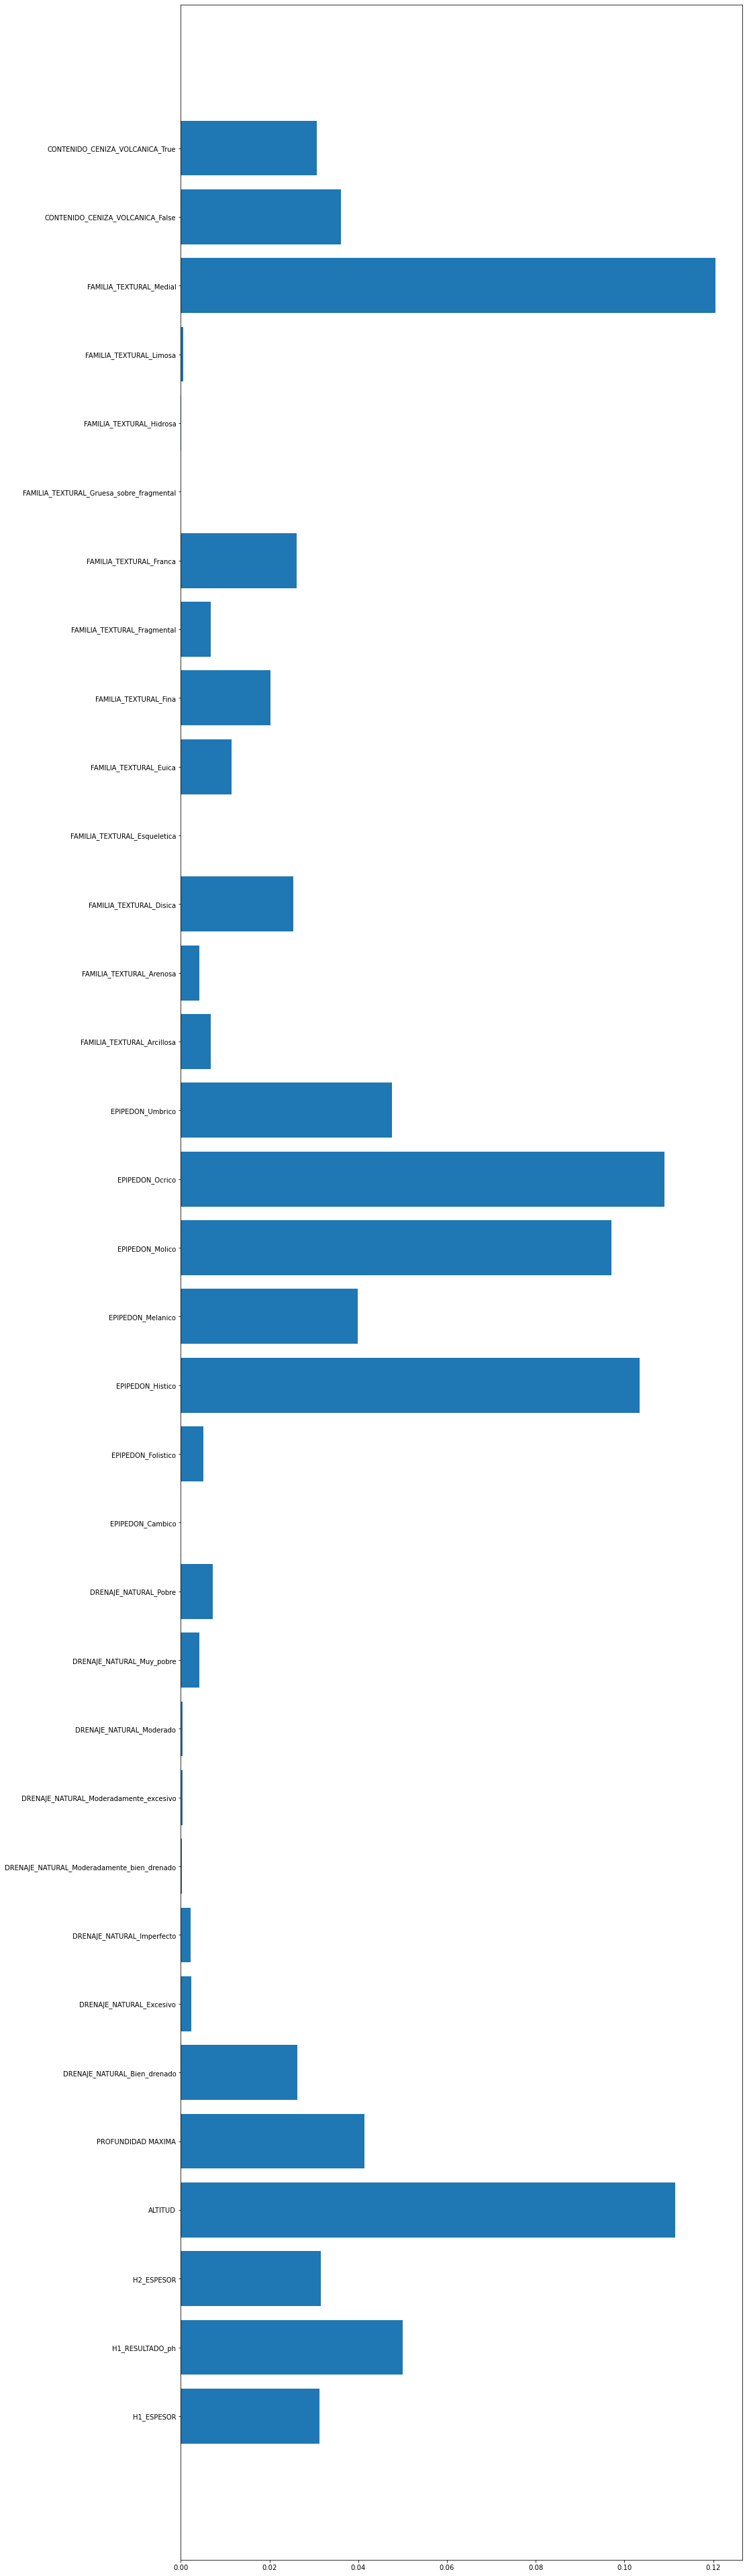

In [27]:
mejor_modelo.feature_importances_
plt.figure(figsize=(15,70))
plt.barh(X.columns, mejor_modelo.feature_importances_)

In [28]:
# Probando el modelo
# ==============================================================================
pred = mejor_modelo.predict(X = X_test)
pred[:10]

array([3, 0, 1, 3, 3, 0, 0, 3, 3, 3], dtype=int8)

In [36]:
X

,H1_ESPESOR,H1_RESULTADO_ph,H2_ESPESOR,ALTITUD,PROFUNDIDAD MAXIMA,DRENAJE_NATURAL_Bien_drenado,DRENAJE_NATURAL_Excesivo,DRENAJE_NATURAL_Imperfecto,DRENAJE_NATURAL_Moderadamente_bien_drenado,DRENAJE_NATURAL_Moderadamente_excesivo,...,FAMILIA_TEXTURAL_Euica,FAMILIA_TEXTURAL_Fina,FAMILIA_TEXTURAL_Fragmental,FAMILIA_TEXTURAL_Franca,FAMILIA_TEXTURAL_Gruesa_sobre_fragmental,FAMILIA_TEXTURAL_Hidrosa,FAMILIA_TEXTURAL_Limosa,FAMILIA_TEXTURAL_Medial,CONTENIDO_CENIZA_VOLCANICA_False,CONTENIDO_CENIZA_VOLCANICA_True
0,53.0,4.2,33.0,3583.0,105.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,26.0,4.0,34.0,3754.0,80.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,12.0,4.5,14.0,3619.0,120.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,37.0,4.5,27.0,3600.0,64.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,43.0,4.5,35.0,3600.0,115.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,23.0,5.5,37.0,1317.0,74.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
11312,22.0,5.0,23.0,1326.0,45.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
11313,30.0,6.5,12.0,1009.0,91.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
11314,21.0,6.0,24.0,526.0,68.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [34]:
X_test

,H1_ESPESOR,H1_RESULTADO_ph,H2_ESPESOR,ALTITUD,PROFUNDIDAD MAXIMA,DRENAJE_NATURAL_Bien_drenado,DRENAJE_NATURAL_Excesivo,DRENAJE_NATURAL_Imperfecto,DRENAJE_NATURAL_Moderadamente_bien_drenado,DRENAJE_NATURAL_Moderadamente_excesivo,...,FAMILIA_TEXTURAL_Euica,FAMILIA_TEXTURAL_Fina,FAMILIA_TEXTURAL_Fragmental,FAMILIA_TEXTURAL_Franca,FAMILIA_TEXTURAL_Gruesa_sobre_fragmental,FAMILIA_TEXTURAL_Hidrosa,FAMILIA_TEXTURAL_Limosa,FAMILIA_TEXTURAL_Medial,CONTENIDO_CENIZA_VOLCANICA_False,CONTENIDO_CENIZA_VOLCANICA_True
7121,20.0,6.0,20.0,204.0,105.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2570,30.0,5.0,40.0,3301.0,120.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4848,11.0,5.0,34.0,1761.0,90.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9054,20.0,4.5,22.0,1450.0,100.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8511,13.0,6.0,26.0,1115.0,73.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,22.0,6.5,33.0,1751.9,127.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9410,18.0,5.0,23.0,3065.0,89.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3551,35.0,5.0,20.0,3320.0,120.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4428,79.0,6.0,21.0,3167.0,120.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [29]:
#Matriz de confusión
#===================================================================================

mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = pred
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = pred,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} %")

Matriz de confusión
-------------------
[[889   2   0  11   0]
 [  0  66   0  73   1]
 [  0   0  25   1   0]
 [  2  22   0 995   4]
 [  0   0   0  14 159]]

El accuracy de test es: 94.25795053003534 %


In [30]:
categorias = df['ORDEN'].astype('category')

dic_cat = dict(enumerate(categorias.cat.categories))
print (dic_cat)

{0: 'Andisol', 1: 'Entisol', 2: 'Histosol', 3: 'Inceptisol', 4: 'Molisol'}


In [31]:
print(
    classification_report(
        y_true = y_test,
        y_pred = pred
    )
)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       902
           1       0.73      0.47      0.57       140
           2       1.00      0.96      0.98        26
           3       0.91      0.97      0.94      1023
           4       0.97      0.92      0.94       173

    accuracy                           0.94      2264
   macro avg       0.92      0.86      0.89      2264
weighted avg       0.94      0.94      0.94      2264



## TAREA DE JOSE

Exportar el modelo y organizar el output para dejar todo en un pipeline que sea reproducible

In [ ]:
import pickle as pk
with open("CATS.pk","wb") as f:
    pk.dump(mejor_modelo,f)

In [ ]:

mis_columnas=['H1_ESPESOR',
 'H1_RESULTADO_ph',
 'H2_ESPESOR',
 'ALTITUD',
 'PROFUNDIDAD_MAXIMA',
 'DRENAJE_NATURAL_Bien_drenado',
 'DRENAJE_NATURAL_Excesivo',
 'DRENAJE_NATURAL_Imperfecto',
 'DRENAJE_NATURAL_Moderadamente_bien_drenado',
 'DRENAJE_NATURAL_Moderadamente_excesivo',
 'DRENAJE_NATURAL_Moderado',
 'DRENAJE_NATURAL_Muy_pobre',
 'DRENAJE_NATURAL_Pobre',
 'EPIPEDON_Cambico',
 'EPIPEDON_Folistico',
 'EPIPEDON_Histico',
 'EPIPEDON_Melanico',
 'EPIPEDON_Molico',
 'EPIPEDON_Ocrico',
 'EPIPEDON_Umbrico',
 'FAMILIA_TEXTURAL_Arcillosa',
 'FAMILIA_TEXTURAL_Arenosa',
 'FAMILIA_TEXTURAL_Disica',
 'FAMILIA_TEXTURAL_Esqueletica',
 'FAMILIA_TEXTURAL_Euica',
 'FAMILIA_TEXTURAL_Fina',
 'FAMILIA_TEXTURAL_Fragmental',
 'FAMILIA_TEXTURAL_Franca',
 'FAMILIA_TEXTURAL_Gruesa_sobre_fragmental',
 'FAMILIA_TEXTURAL_Hidrosa',
 'FAMILIA_TEXTURAL_Limosa',
 'FAMILIA_TEXTURAL_Medial',
 'CONTENIDO_CENIZA_VOLCANICA_False',
 'CONTENIDO_CENIZA_VOLCANICA_True']
df=pd.DataFrame([[0.0 for i in range(len(mis_columnas)) ]],columns=mis_columnas)
lo_que_llega={"DRENAJE_NATURAL":'Imperfecto',"EPIPEDON":"Folistico", 'FAMILIA_TEXTURAL':'Fragmental', 'CONTENIDO_CENIZA_VOLCANICA': True, 
              'H1_ESPESOR':4, 'H1_RESULTADO_ph':6.3, 'H2_ESPESOR':26, 'ALTITUD':2600.9067, 'PROFUNDIDAD_MAXIMA':40.23 }

df["DRENAJE_NATURAL_"+lo_que_llega["DRENAJE_NATURAL"]]=1.0
df["EPIPEDON_"+lo_que_llega["EPIPEDON"]]=1.0
df["FAMILIA_TEXTURAL_"+lo_que_llega["FAMILIA_TEXTURAL"]]=1.0
df["CONTENIDO_CENIZA_VOLCANICA_"+str(lo_que_llega["CONTENIDO_CENIZA_VOLCANICA"])]=1.0


df["H1_ESPESOR"]=lo_que_llega["H1_ESPESOR"]
df['H1_RESULTADO_ph']=lo_que_llega['H1_RESULTADO_ph']
df['H2_ESPESOR']=lo_que_llega['H2_ESPESOR']
df['ALTITUD']=lo_que_llega['ALTITUD']
df['PROFUNDIDAD_MAXIMA']=lo_que_llega['PROFUNDIDAD_MAXIMA']





No es una buena solucion hacerlo de esta forma, es mejor que hagamos un preprocesameinto que tenga en cuenta la estandarización y la creacion de las variables categoricas

# Nuevo modelo ( cambiar el pipeline)

In [6]:
from sklearn import preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.utils.class_weight import compute_class_weight

In [7]:
with open('../Datos_Limpios_modelo_2.csv') as f:
    df = pd.read_csv(f, delimiter=',')
df["CONTENIDO_CENIZA_VOLCANICA"]=df["CONTENIDO_CENIZA_VOLCANICA"].astype(str)
X = df.drop(columns=['ORDEN','IGUALDAD','H1_NOMENCLATURA','H1_COLOR_MATRIZ_HUMEDO1','H2_NOMENCLATURA','REGIMEN_HUMEDAD',
                  'CLASE_PENDIENTE','REGIMEN_TEMPERATURA','CLIMA_AMBIENTAL','TIPO_OBSERVACION','LONGITUD','LATITUD'])
X=X[sorted(X.columns)]

le = preprocessing.LabelEncoder()
y=le.fit_transform(df.ORDEN)

#numeric_features=X.select_dtypes(exclude=['object', 'category','bool']).columns.to_list()
#categorical_features=X.select_dtypes(include=['object', 'category','bool']).columns.to_list()
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, make_column_selector(dtype_include=['object', 'category','bool'])),
        ('numeric',numeric_transformer,make_column_selector(dtype_exclude=['object', 'category','bool']))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state = 133)
weights= compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)

weight_dict={}
for i,j in enumerate(np.unique(y_train)):
    weight_dict[j]=weights[i]
    
    
mejor_modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                n_estimators = 150,
                class_weight = weight_dict,
                max_features = 'log2',
                max_depth = 31,
                criterion = 'entropy')
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', mejor_modelo)])


clf.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f992f213c70>),
                                                 ('numeric', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f992f242a60>)])),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 0.5021449704142011,
                                                      1: 3.2251781472684087,
                                                      2: 17.1873417721519,
                                                      3: 0.44285714285714284,
                                                      4: 2.616184971098266},
                                        cri

In [8]:
clf.score(X_test,y_test)

0.9370444002650762

#### Es importante que las columnas etén en el mismo orden en el que se entrenó el modelo para que todo sea reproducible

In [335]:
a=X_test.iloc[0,np.random.choice(range(X_test.shape[1]),size=X_test.shape[1],replace=False)].to_dict()
new_a=dict([(key,a[key]) for key in sorted(a)])
prediction=clf.predict(pd.DataFrame(data=new_a,index=[0]))

In [338]:
import pickle as pk
with open("CATS_pipeline.pk","wb") as f:
    pk.dump(clf,f)
with open("CATS_label_encoder.pk","wb") as f:
    pk.dump(le,f)

#### Pruebas para revisar que el moedlo se esté exportando y cargando bien

In [313]:
with open("CATS_pipeline.pk", "rb") as f:
    clasifier=pk.load(f)

In [314]:
clasifier.score(X_test,y_test)

0.9430212014134276

In [317]:
clf.predict(X_test.iloc[0].to_frame().T)

array([3])

In [332]:
a=X_test.iloc[0,np.random.choice(range(X_test.shape[1]),size=X_test.shape[1],replace=False)].to_dict()
new_a=dict([(key,a[key]) for key in sorted(a)])
prediction=int(clf.predict(pd.DataFrame(data=new_a,index=[0]))[0])

In [448]:
result=X_test.iloc[:3,np.random.choice(range(X_test.shape[1]),size=X_test.shape[1],replace=False)].to_dict(orient="list")

In [449]:
new_result=dict([(key,result[key]) for key in sorted(result)])

In [ ]:
columns=le.inverse_transform(clf.classes_.T)

#### Exportar los datos de prueba para realizar predicciones en la aplicación

In [504]:
with open("test_data.pk","wb") as f:
    pk.dump((X_test,y_test),f)

In [505]:
with open("test_data.pk","rb") as f:
    x_1,y_1=pk.load(f)

# Pruebas API

### API predict

In [9]:
import requests
import json

{'ALTITUD': 291.0,
 'CONTENIDO_CENIZA_VOLCANICA': 'False',
 'DRENAJE_NATURAL': 'Pobre',
 'EPIPEDON': 'Ocrico',
 'FAMILIA_TEXTURAL': 'Fina',
 'H1_ESPESOR': 17.0,
 'H1_RESULTADO_ph': 4.5,
 'H2_ESPESOR': 38.0,
 'PROFUNDIDAD_MAXIMA': 110.0}

In [20]:
url="http://0.0.0.0:8000/api/predict"
data=X_test.iloc[2].to_dict()
x=requests.post(url,data=json.dumps(data))
result=dict(x.json())

In [ ]:
result

In [19]:
result["prediction"]

'Entisol'

Si funciona!

## API predict many

In [23]:
X_test.shape

(4527, 9)

In [36]:
url='http://0.0.0.0:8000/api/predict_many'
data=X_test.iloc[:].to_dict(orient="list")
x=requests.post(url,data=json.dumps(data))

In [37]:
pd.Series(x.json()["predictions"])

0          Andisol
1       Inceptisol
2          Entisol
3          Andisol
4          Andisol
           ...    
4522       Andisol
4523    Inceptisol
4524       Andisol
4525       Andisol
4526       Andisol
Length: 4527, dtype: object

Funciona!